## Mission : It's Your Turn!

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

## 0. 라이브러리 설치

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
Loan_payment_df = pd.read_csv('./Loan payments data.csv')

## 1. 데이데셋 선정 : [대출 고객의 상환 정보](https://www.kaggle.com/zhijinzhai/loandata/version/1)

### 분석 목적 및 데이터 확인

In [81]:
Loan_payment_df.head(5)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,Loan_status,Education
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,10/7/2016,2016-09-14 19:31:00,NaN,45,High School or Below,male,1,0
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,10/7/2016,2016-10-07 09:00:00,NaN,50,Bechalor,female,1,2
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,10/7/2016,2016-09-25 16:58:00,NaN,33,Bechalor,female,1,2
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,9/22/2016,2016-09-22 20:00:00,NaN,27,college,male,1,1
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,10/8/2016,2016-09-23 21:36:00,NaN,28,college,female,1,1


In [5]:
Loan_payment_df.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

- Loan_ID : 대출 고객 ID
- loan_status : 대출 상환 여부
- Principal	: 대출 금액
- terms	: 대출금 지급까지 걸린 기간
- effective_date : 계약 효과가 발휘되는 날짜
- due_date : 대출금 납부 기한 날짜
- paid_off_time : 대출금을 모두 상환한 날짜
- past_due_days : 대출금 납부기한을 초과한 날짜
- age : 고객 나이
- education : 고객의 교육 수준(최종학력)
- Gender : 고객의 성별

In [6]:
Loan_payment_df.dtypes

Loan_ID            object
loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

### 데이터 전체적으로 살펴보기

In [7]:
Loan_payment_df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


- Principal의 경우 평균 943달러, 최대 1000달러
- terms의 경우 지급까지 평균 22일 소요
- past_due_days의 경우 평균 36일 소요
- age의 경우 최대 51세, 최소 18세로 다양한 연령층이 존재

In [8]:
Loan_payment_df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

- paid_off_time : 대출금을 모두 상환한 날짜
- past_due_days : 대출금을 모두 상환하는데 걸린 기간

### 데이터 범주화

- loan_status(대출 상환 여부)의 범주화
- 0: 상환X, 1: 상환O

In [9]:
Loan_payment_df['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

- PAIDOFF : 기한 내에 대출금 모두 상환
- COLLECTION : Data 수집 당시까지 미납(연체)
- COLLECTION_PAIDOFF : 기한은 지났지만 대출금 모두 상환
- 따라서 `PAIDOFF -> 1`(상환 O),
- `COLLECTION,COLLECTION_PAIDOFF = 0`(상환 X)

In [10]:
new_loan_status = []

for i in range(500):
    if Loan_payment_df['loan_status'][i] == 'PAIDOFF':
        new_loan_status.append(1)
    else:
        new_loan_status.append(0)

Loan_payment_df['Loan_status'] = new_loan_status

In [30]:
Loan_payment_df['education'].unique()

array(['High School or Below', 'Bechalor', 'college', 'Master or Above'],
      dtype=object)

- High School or Below : 고졸
- college : 대졸
- Bechalor : 석사
- Master or Above : 박사 이상
- 따라서 `High School or Below -> 0`
- `college -> 1`
- `Bechalor -> 2`
- `Master or Above -> 3`

In [32]:
new_education = []

for i in range(500):
    if Loan_payment_df['education'][i] == 'High School or Below':
        new_education.append(0)
    elif Loan_payment_df['education'][i] == 'college':
        new_education.append(1)
    elif Loan_payment_df['education'][i] == 'Bechalor':
        new_education.append(2)
    else:
        new_education.append(3)

Loan_payment_df['Education'] = new_education

### 결측치 처리

- 대출금의 상환여부를 종속변수라 생각
- 날짜에 맞게 대출금을 상환한 경우 past_due_days(대출금 납부기한을 초과한 날짜)는 null값이 되는 것이 정상 : loan_status(Paidoff)
- 아직 상환하지 않은 경우 paid_off_time(대출금을 모두 상환한 날짜)는 null값이 되는 것이 정상 : loan_status(Collection or Collection=Paidoff)
- 따라서 결측치 처리X (분석에 이용x)

In [11]:
Loan_payment_df[Loan_payment_df['paid_off_time'].isnull()== True]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,Loan_status
300,xqd20160301,COLLECTION,1000,15,9/9/2016,9/23/2016,NaN,76.0,29,college,male,0
301,xqd20160302,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,37,High School or Below,male,0
302,xqd20160303,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,33,High School or Below,male,0
303,xqd20160304,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,27,college,male,0
304,xqd20160305,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,24,Bechalor,male,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,xqd20160396,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,25,High School or Below,male,0
396,xqd20160397,COLLECTION,1000,30,9/12/2016,10/11/2016,NaN,58.0,33,High School or Below,male,0
397,xqd20160398,COLLECTION,800,15,9/12/2016,9/26/2016,NaN,73.0,39,college,male,0
398,xqd20160399,COLLECTION,1000,30,9/12/2016,11/10/2016,NaN,28.0,28,college,male,0


In [12]:
Loan_payment_df[Loan_payment_df['past_due_days'].isnull()== True]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,Loan_status
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male,1
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female,1
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female,1
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male,1
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female,1
...,...,...,...,...,...,...,...,...,...,...,...,...
295,xqd20160296,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 13:00,NaN,30,college,female,1
296,xqd20160297,PAIDOFF,800,15,9/14/2016,9/28/2016,9/21/2016 4:42,NaN,27,college,male,1
297,xqd20160298,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 9:00,NaN,29,High School or Below,male,1
298,xqd20160299,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 9:00,NaN,40,High School or Below,male,1


### object type -> datetime type(필요X)

In [13]:
Loan_payment_df['paid_off_time']= pd.to_datetime(Loan_payment_df['paid_off_time'])
Loan_payment_df['effective_date']= pd.to_datetime(Loan_payment_df['effective_date'], format='%m/%d/%Y', errors='coerce')

In [14]:
Loan_payment_df.dtypes

Loan_ID                   object
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date                  object
paid_off_time     datetime64[ns]
past_due_days            float64
age                        int64
education                 object
Gender                    object
Loan_status                int64
dtype: object

In [15]:
Loan_payment_df.corr()

,Principal,terms,past_due_days,age,Loan_status
Principal,1.000000,0.534302,-0.093139,-0.092613,-0.087235
terms,0.534302,1.000000,-0.102613,-0.074259,-0.108395
past_due_days,-0.093139,-0.102613,1.000000,-0.053849,NaN
age,-0.092613,-0.074259,-0.053849,1.000000,0.018939
Loan_status,-0.087235,-0.108395,NaN,0.018939,1.000000


- 수치형 데이터의 대부분의 상관계수가 높다고 볼수 없다.
- Principal 과 terms은 양의 상관계수가 존재
- terms와 past_due_day는 양의 상관계수가 존재

## 2. 데이터셋에 대한 가설

- Principal(대출 금액)와 상환여부 사이에 관계가 존재하는지?
- Gender(성별)와 상환여부 사이에 관계가 존재하는지?
- 여성과 남성 중 상환율이 더 높은 경우는?
- Age(나이)가 상환여부 사이에 관계가 존재하는지?
- Education(교육수준)와 상환여부 사이에 관계가 존재하는지?
- Terms(대출금 지급까지 걸린 기간)와 상환여부 사이에 관계가 존재하는지?
- Age와 Education사이에 관계가 존재하는지?
- Age와 Education에 따라 상환여부가 달라지는지?

- Terms와 Gender에 따라 상환여부가 달라지는지?


## 3. 가설을 증명하기 위한 여러 데이터 분석 / 시각화

### 데이터의 개별 속성 파악하기

### I. Loan_status
- `0 : 상환`
- `1 : 미상환`

In [16]:
Loan_payment_df['Loan_status'].value_counts()

1    300
0    200
Name: Loan_status, dtype: int64

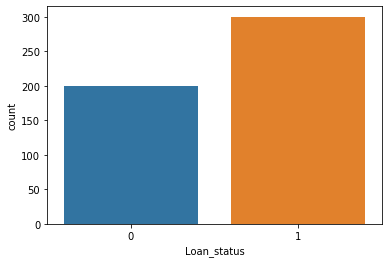

In [17]:
sns.countplot(x ='Loan_status', data = Loan_payment_df)
plt.show()

- 상환 : 300명
- 미상환 : 200명

### II. Principal

In [18]:
Loan_payment_df['Principal'].describe() 

count     500.000000
mean      943.200000
std       115.240274
min       300.000000
25%      1000.000000
50%      1000.000000
75%      1000.000000
max      1000.000000
Name: Principal, dtype: float64

In [19]:
Loan_payment_df['Principal'].value_counts()

1000    377
800     111
300       6
500       3
900       2
700       1
Name: Principal, dtype: int64

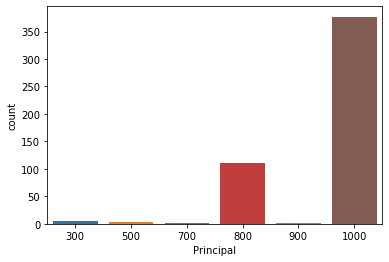

In [46]:
sns.countplot(Loan_payment_df['Principal'])
plt.show()

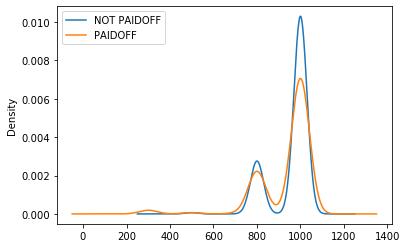

In [21]:
Loan_payment_df['Principal'][Loan_payment_df.Loan_status == 0].plot(kind='kde')
Loan_payment_df['Principal'][Loan_payment_df.Loan_status == 1].plot(kind='kde')
plt.legend(['NOT PAIDOFF','PAIDOFF'])
plt.show()

- 많은 고객들이 빌리는 금액 800달러와 1000달러의 경우 상환하는 경우보다 미상환 하는 경우가 많다 

### III. Gender
- `female`
- `male`

In [22]:
Loan_payment_df.groupby(['Gender','Loan_status'])['Loan_status'].count()

Gender  Loan_status
female  0               24
        1               53
male    0              176
        1              247
Name: Loan_status, dtype: int64

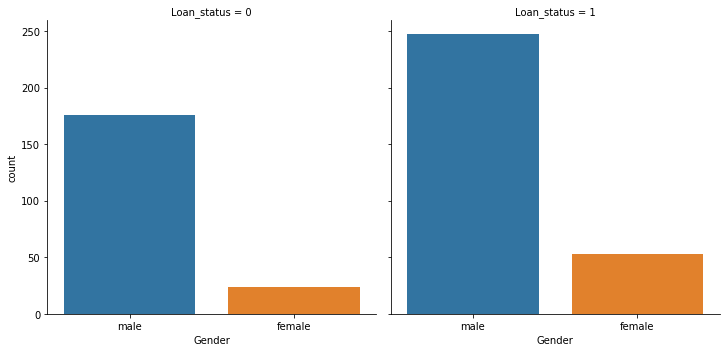

In [23]:
sns.catplot(x='Gender',col ='Loan_status', kind = 'count',data=Loan_payment_df)
plt.show()

In [100]:
Loan_payment_df[['Gender','Loan_status']].groupby(['Gender']).mean()

,Loan_status
Gender,
female,0.688312
male,0.583924


- 상환률은 남성보다 여성의 경우 더 높다.

### IV. Age

In [24]:
Loan_payment_df['age'].describe()

count    500.000000
mean      31.116000
std        6.084784
min       18.000000
25%       27.000000
50%       30.000000
75%       35.000000
max       51.000000
Name: age, dtype: float64

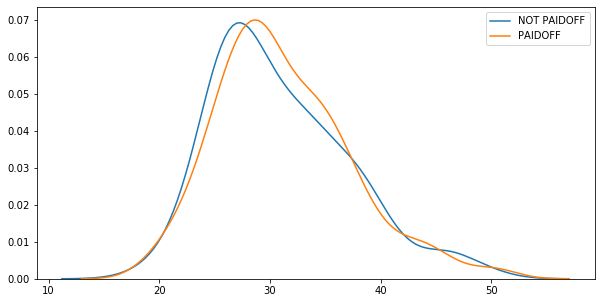

In [25]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(Loan_payment_df[Loan_payment_df.Loan_status==0]['age'],ax=ax)
sns.kdeplot(Loan_payment_df[Loan_payment_df.Loan_status==1]['age'],ax=ax)
plt.legend(['NOT PAIDOFF','PAIDOFF'])
plt.show()

- 30대의 경우 상환하는 사람이 상환하지 못하는 사람보다 많음
- 20대의 경우 상환하지 못하는 사람이 상환하는 사람보다 많음

### V. Education
- `0 : High School or Below`
- `1 : college`
- `2 : Bechalor`
- `3 : Master or Above`

In [111]:
Loan_payment_df[['Education','Loan_status']].groupby(['Education']).count()

,Loan_status
Education,
0,209
1,220
2,67
3,4


In [37]:
Loan_payment_df[['Education','Loan_status']].groupby(['Education']).sum()

,Loan_status
Education,
0,123
1,133
2,41
3,3


In [113]:
Loan_payment_df[['Education','Loan_status','Gender']].groupby(['Education','Gender']).count()

Loan_status
Education Gender             
0         female           31
          male            178
1         female           33
          male            187
2         female           13
          male             54
3         male              4

- 여성의 경우 박사를 졸업한 인원이 존재하지 않음

In [39]:
Loan_payment_df[['Education','Loan_status']].groupby(['Education']).mean()

,Loan_status
Education,
0,0.588517
1,0.604545
2,0.611940
3,0.750000


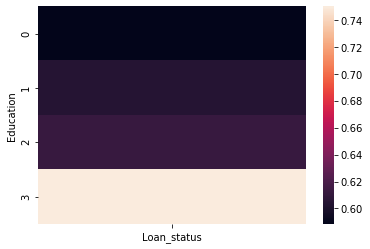

In [40]:
sns.heatmap(Loan_payment_df[['Education','Loan_status']].groupby(['Education']).mean())
plt.show()

- Education의 수준이 높을수록 상환하는 사람의 비율이 높다

### VI. Terms

In [52]:
Loan_payment_df['terms'].unique()

array([30, 15,  7])

In [53]:
Loan_payment_df['terms'].value_counts()

30    272
15    207
7      21
Name: terms, dtype: int64

In [70]:
Loan_payment_df.groupby(['terms','Loan_status'])['Loan_status'].count()

terms  Loan_status
7      0                1
       1               20
15     0               80
       1              127
30     0              119
       1              153
Name: Loan_status, dtype: int64

In [79]:
Loan_payment_df[['terms','Loan_status']].groupby(['terms']).mean()

,Loan_status
terms,
7,0.952381
15,0.613527
30,0.562500


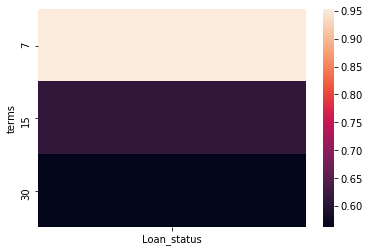

In [80]:
sns.heatmap(Loan_payment_df[['terms','Loan_status']].groupby(['terms']).mean())
plt.show()

- 대출금 지급까지 걸린 기간이 7일인 경우, 상환비율이 95%로 매우 높음을 확인
- 대출금 지급까지 걸린 기간이 짧을수록 상환비율이 더 높다는 것을 확인


### VII. Age vs Education

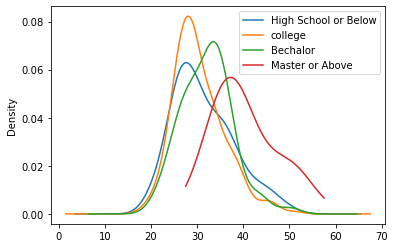

In [95]:
Loan_payment_df['age'][Loan_payment_df.Education == 0].plot(kind='kde')
Loan_payment_df['age'][Loan_payment_df.Education == 1].plot(kind='kde')
Loan_payment_df['age'][Loan_payment_df.Education == 2].plot(kind='kde')
Loan_payment_df['age'][Loan_payment_df.Education == 3].plot(kind='kde')
plt.legend(['High School or Below','college','Bechalor','Master or Above'])
plt.show()

- 연령대가 높아질수록 더 높은 학위를 가진것으로 확인

### VIII. Age + Education vs Loan_status

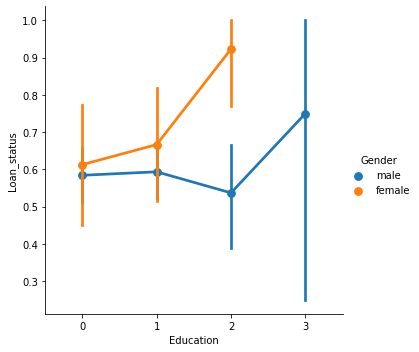

In [110]:
sns.catplot(x='Education',y='Loan_status',hue='Gender',kind='point',data=Loan_payment_df)
plt.show()

- 학력이 높아질수록 여성의 경우 남성보다 상환을 잘하는 경향을 확인
- 남성이면서 박사졸업의 경우, 편차가 매우 심한것을 확인

### IX. Terms + Gender vs Loan_status

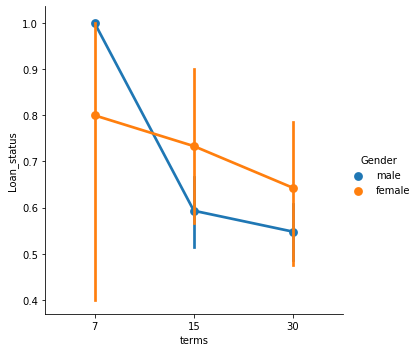

In [115]:
sns.catplot(x='terms',y='Loan_status',hue='Gender',kind='point',data=Loan_payment_df)
plt.show()

- 남성은 대출금 지급까지 걸린 기간이 7일인 경우 높은 확률로 기한까지 상환을 하지만, 대출금 지급까지 걸린 기간이 15일 이상인 경우 상환율이 떨어지는 경향을 확인
- 여성의 경우, 대출급 지금까지 걸린 기간이 길어질수록 상환율이 떨어지는 것을 확인